In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [20]:
cities


['norman wells',
 'bethel',
 'ushuaia',
 'rikitea',
 'nabire',
 'talnakh',
 'souillac',
 'puerto ayora',
 'lavrentiya',
 'lakes entrance',
 'kapaa',
 'coihaique',
 'waingapu',
 'tlahualilo',
 'upernavik',
 'tubruq',
 'ponta do sol',
 'sumbawa',
 'mehamn',
 'vaini',
 'tommot',
 'terrace',
 'saskylakh',
 'cape town',
 'taolanaro',
 'fortuna',
 'bredasdorp',
 'illoqqortoormiut',
 'port hedland',
 'mpika',
 'barentsburg',
 'bubaque',
 'taltal',
 'tuktoyaktuk',
 'hobart',
 'cidreira',
 'altay',
 'mount pleasant',
 'kansk',
 'vsevolodo-vilva',
 'port alfred',
 'bilibino',
 'bluff',
 'bur gabo',
 'new norfolk',
 'ribeira grande',
 'katsuura',
 'barrow',
 'griffith',
 'tabiauea',
 'baghdad',
 'marzuq',
 'palabuhanratu',
 'avarua',
 'xiongshi',
 'manuk mangkaw',
 'adrar',
 'belushya guba',
 'brae',
 'vokhtoga',
 'beian',
 'san cristobal',
 'mar del plata',
 'adre',
 'albany',
 'jamestown',
 'salinas',
 'san patricio',
 'stoyba',
 'constitucion',
 'marcona',
 'senador canedo',
 'busselton',
 'ma

In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Import the API key.
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42


In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [26]:
import requests as req

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city} ")
    print(f"CityURL: | {city_url}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | norman wells 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=norman+wells
Processing Record 2 of Set 12 | bethel 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=bethel
Processing Record 3 of Set 12 | ushuaia 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=ushuaia
Processing Record 4 of Set 12 | rikitea 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=rikitea
Processing Record 5 of Set 12 | nabire 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=nabire
Processing Record 6 of Set 12 | talnakh 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=talnakh
Processing Recor

Processing Record 50 of Set 12 | tabiauea 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=tabiauea
City not found. Skipping...
Processing Record 1 of Set 13 | baghdad 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=baghdad
Processing Record 2 of Set 13 | marzuq 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=marzuq
Processing Record 3 of Set 13 | palabuhanratu 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 13 | avarua 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=avarua
Processing Record 5 of Set 13 | xiongshi 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 48 of Set 13 | carnarvon 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=carnarvon
Processing Record 49 of Set 13 | isangel 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=isangel
Processing Record 50 of Set 13 | alta floresta 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=alta+floresta
Processing Record 1 of Set 14 | dongli 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=dongli
Processing Record 2 of Set 14 | provideniya 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=provideniya
Processing Record 3 of Set 14 | kruisfontein 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=

Processing Record 48 of Set 14 | nanyang 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=nanyang
Processing Record 49 of Set 14 | lompoc 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=lompoc
Processing Record 50 of Set 14 | taoudenni 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=taoudenni
Processing Record 1 of Set 15 | northam 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=northam
Processing Record 2 of Set 15 | vardo 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=vardo
Processing Record 3 of Set 15 | aykhal 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=aykhal
Processing Record 4 of 

Processing Record 48 of Set 15 | mount gambier 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=mount+gambier
Processing Record 49 of Set 15 | rungata 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=rungata
City not found. Skipping...
Processing Record 50 of Set 15 | ostrovnoy 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=ostrovnoy
Processing Record 1 of Set 16 | comodoro rivadavia 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=comodoro+rivadavia
Processing Record 2 of Set 16 | ahipara 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=ahipara
Processing Record 3 of Set 16 | kavieng 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 48 of Set 16 | haibowan 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=haibowan
City not found. Skipping...
Processing Record 49 of Set 16 | ahuimanu 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=ahuimanu
Processing Record 50 of Set 16 | gao 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=gao
Processing Record 1 of Set 17 | progreso 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=progreso
Processing Record 2 of Set 17 | porto murtinho 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=porto+murtinho
Processing Record 3 of Set 17 | urucara 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979

Processing Record 48 of Set 17 | asau 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=asau
Processing Record 49 of Set 17 | reconquista 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=reconquista
Processing Record 50 of Set 17 | rehburg-loccum 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=rehburg-loccum
Processing Record 1 of Set 18 | medea 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=medea
Processing Record 2 of Set 18 | padang 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=padang
Processing Record 3 of Set 18 | cairns 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=cairns
Processing 

Processing Record 47 of Set 18 | thunder bay 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=thunder+bay
Processing Record 48 of Set 18 | almaznyy 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=almaznyy
Processing Record 49 of Set 18 | bodden town 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=bodden+town
Processing Record 50 of Set 18 | lolua 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=lolua
City not found. Skipping...
Processing Record 1 of Set 19 | mandalgovi 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=mandalgovi
Processing Record 2 of Set 19 | mbacke 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa

Processing Record 46 of Set 19 | fuji 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=fuji
Processing Record 47 of Set 19 | kazalinsk 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=kazalinsk
City not found. Skipping...
Processing Record 48 of Set 19 | wana 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=wana
Processing Record 49 of Set 19 | kempten 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=kempten
Processing Record 50 of Set 19 | matara 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=matara
Processing Record 1 of Set 20 | ailigandi 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=ailig

Processing Record 45 of Set 20 | kaeo 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=kaeo
Processing Record 46 of Set 20 | sibenik 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=sibenik
Processing Record 47 of Set 20 | montepuez 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=montepuez
Processing Record 48 of Set 20 | noumea 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=noumea
Processing Record 49 of Set 20 | panikian 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=panikian
Processing Record 50 of Set 20 | srednekolymsk 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=srednekolymsk
Proces

Processing Record 45 of Set 21 | lata 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=lata
Processing Record 46 of Set 21 | gondanglegi 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=gondanglegi
Processing Record 47 of Set 21 | nantucket 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=nantucket
Processing Record 48 of Set 21 | shuangcheng 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=shuangcheng
Processing Record 49 of Set 21 | winthrop 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=winthrop
Processing Record 50 of Set 21 | burnie 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=burnie
Pr

Processing Record 44 of Set 22 | guantanamo 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=guantanamo
Processing Record 45 of Set 22 | huambo 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=huambo
Processing Record 46 of Set 22 | korsakov 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=korsakov
Processing Record 47 of Set 22 | senmonorom 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=senmonorom
City not found. Skipping...
Processing Record 48 of Set 22 | saint-pierre 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d3fa51410979910db28b42&q=saint-pierre
Processing Record 49 of Set 22 | kudat 
CityURL: | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28522c72b9d

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.28,-126.83,17.60,92,75,5.82,CA,2020-10-24 19:52:10
1,Bethel,41.37,-73.41,60.80,77,90,10.92,US,2020-10-24 19:51:37
2,Ushuaia,-54.80,-68.30,50.00,53,40,18.34,AR,2020-10-24 19:57:25
3,Rikitea,-23.12,-134.97,74.62,84,90,22.66,PF,2020-10-24 19:51:29
4,Nabire,-3.37,135.48,75.36,84,100,3.40,ID,2020-10-24 19:51:34
5,Talnakh,69.49,88.40,14.00,92,75,13.42,RU,2020-10-24 19:51:35
6,Souillac,-20.52,57.52,75.20,69,40,11.41,MU,2020-10-24 19:51:41
7,Puerto Ayora,-0.74,-90.35,78.80,69,40,20.80,EC,2020-10-24 19:51:32
8,Lavrentiya,65.58,-171.00,32.97,89,67,7.00,RU,2020-10-24 19:51:34
9,Lakes Entrance,-37.88,147.98,48.00,90,27,1.01,AU,2020-10-24 19:58:28


In [49]:
df = city_data_df

In [51]:
print (df)

             City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0    Norman Wells  65.28 -126.83     17.60        92          75        5.82   
1          Bethel  41.37  -73.41     60.80        77          90       10.92   
2         Ushuaia -54.80  -68.30     50.00        53          40       18.34   
3         Rikitea -23.12 -134.97     74.62        84          90       22.66   
4          Nabire  -3.37  135.48     75.36        84         100        3.40   
..            ...    ...     ...       ...       ...         ...         ...   
530       Huilong  31.81  121.66     57.99        81           0        1.99   
531      Yanliang  34.66  109.23     54.00        93           0        2.24   
532        Maridi   4.92   29.47     71.47        85          85        3.13   
533         Krabi   8.07   98.91     81.00        94          20        3.36   
534      Ko Samui   9.54   99.94     81.73        70          25        7.38   

    Country                 Date  
0   

In [58]:
column_names = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind speed"]

df = df.reindex(columns=column_names)

df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed
0,Norman Wells,CA,2020-10-24 19:52:10,65.28,-126.83,17.60,92,75,NaN
1,Bethel,US,2020-10-24 19:51:37,41.37,-73.41,60.80,77,90,NaN
2,Ushuaia,AR,2020-10-24 19:57:25,-54.80,-68.30,50.00,53,40,NaN
3,Rikitea,PF,2020-10-24 19:51:29,-23.12,-134.97,74.62,84,90,NaN
4,Nabire,ID,2020-10-24 19:51:34,-3.37,135.48,75.36,84,100,NaN
5,Talnakh,RU,2020-10-24 19:51:35,69.49,88.40,14.00,92,75,NaN
6,Souillac,MU,2020-10-24 19:51:41,-20.52,57.52,75.20,69,40,NaN
7,Puerto Ayora,EC,2020-10-24 19:51:32,-0.74,-90.35,78.80,69,40,NaN
8,Lavrentiya,RU,2020-10-24 19:51:34,65.58,-171.00,32.97,89,67,NaN
9,Lakes Entrance,AU,2020-10-24 19:58:28,-37.88,147.98,48.00,90,27,NaN


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [63]:
import time

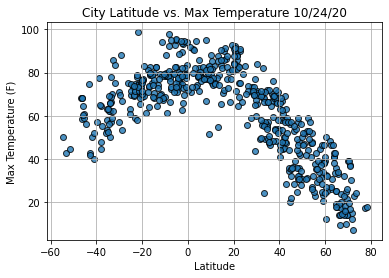

In [64]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

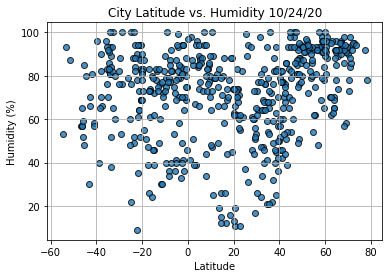

In [65]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

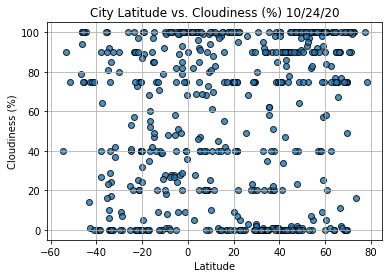

In [66]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

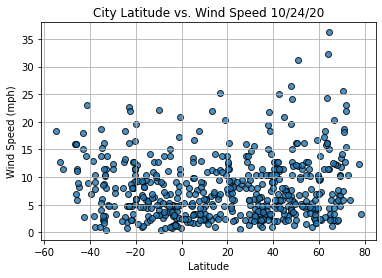

In [67]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [101]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [102]:
index13 = df.loc[13]

In [103]:
index13 = city_data_df.loc[13]
index13

City                    Upernavik
Lat                         72.79
Lng                        -56.15
Max Temp                    22.73
Humidity                       95
Cloudiness                    100
Wind Speed                  10.31
Country                        GL
Date          2020-10-24 19:57:44
Name: 13, dtype: object

In [104]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
530     True
531     True
532     True
533     True
534     True
Name: Lat, Length: 535, dtype: bool

In [105]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.28,-126.83,17.60,92,75,5.82,CA,2020-10-24 19:52:10
1,Bethel,41.37,-73.41,60.80,77,90,10.92,US,2020-10-24 19:51:37
2,Ushuaia,-54.80,-68.30,50.00,53,40,18.34,AR,2020-10-24 19:57:25
3,Rikitea,-23.12,-134.97,74.62,84,90,22.66,PF,2020-10-24 19:51:29
4,Nabire,-3.37,135.48,75.36,84,100,3.40,ID,2020-10-24 19:51:34


In [106]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.28,-126.83,17.60,92,75,5.82,CA,2020-10-24 19:52:10
1,Bethel,41.37,-73.41,60.80,77,90,10.92,US,2020-10-24 19:51:37
5,Talnakh,69.49,88.40,14.00,92,75,13.42,RU,2020-10-24 19:51:35
8,Lavrentiya,65.58,-171.00,32.97,89,67,7.00,RU,2020-10-24 19:51:34
10,Kapaa,22.08,-159.32,82.99,74,20,8.05,US,2020-10-24 19:51:27
...,...,...,...,...,...,...,...,...,...
530,Huilong,31.81,121.66,57.99,81,0,1.99,CN,2020-10-24 19:59:27
531,Yanliang,34.66,109.23,54.00,93,0,2.24,CN,2020-10-24 19:59:27
532,Maridi,4.92,29.47,71.47,85,85,3.13,SS,2020-10-24 19:59:27
533,Krabi,8.07,98.91,81.00,94,20,3.36,TH,2020-10-24 19:59:27


In [107]:
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ushuaia,-54.80,-68.30,50.00,53,40,18.34,AR,2020-10-24 19:57:25
3,Rikitea,-23.12,-134.97,74.62,84,90,22.66,PF,2020-10-24 19:51:29
4,Nabire,-3.37,135.48,75.36,84,100,3.40,ID,2020-10-24 19:51:34
6,Souillac,-20.52,57.52,75.20,69,40,11.41,MU,2020-10-24 19:51:41
7,Puerto Ayora,-0.74,-90.35,78.80,69,40,20.80,EC,2020-10-24 19:51:32
...,...,...,...,...,...,...,...,...,...
521,Paita,-5.09,-81.11,73.40,78,0,13.87,PE,2020-10-24 19:59:26
523,Altamira,-3.20,-52.21,94.57,33,49,3.18,BR,2020-10-24 19:59:26
525,Tual,-5.67,132.75,82.56,72,58,4.79,ID,2020-10-24 19:59:27
526,Charters Towers,-20.10,146.27,71.40,81,0,6.08,AU,2020-10-24 19:59:27


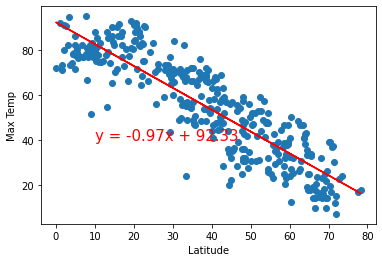

In [108]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

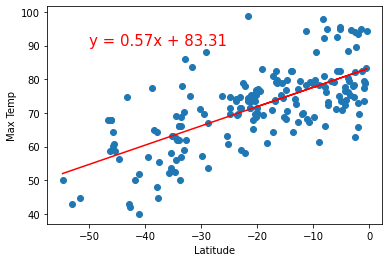

In [109]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

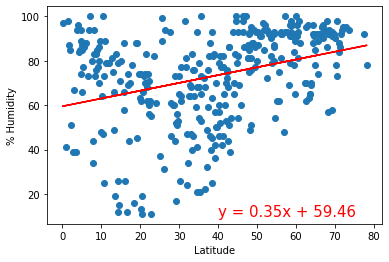

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

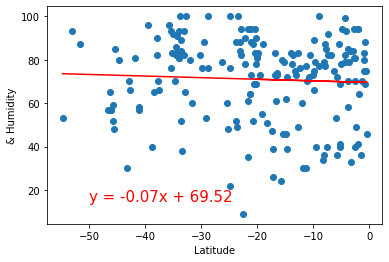

In [111]:
#Linear regression for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '& Humidity', (-50,15))

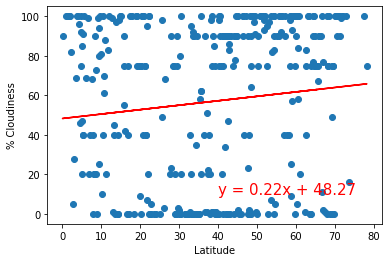

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

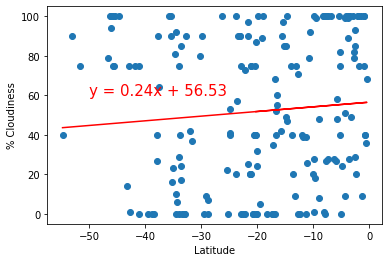

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

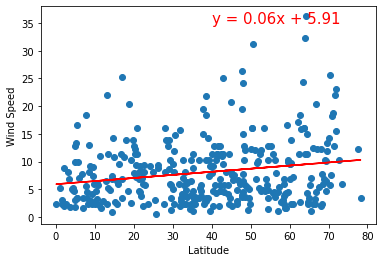

In [114]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

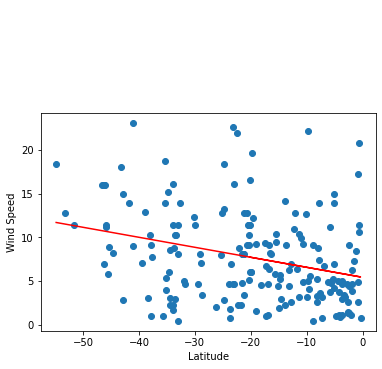

In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))